## Machine Learning: K-Nearest Neighbors Churn

*Submitted by:*  
**Christian Elijah Darvin**  
BCS32  
College of Information and Computer Studies - De La Salle University Dasmariñas


In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [507]:
df = pd.read_csv("./data/churn_dataset.csv", index_col=0)

In [508]:
df

,Customer ID,Age,MonthlyUsage,Payment Method,Tenure in Months,Churn
0,4526-ZJJTM,72,354,Bank Withdrawal,20,0
1,5302-BDJNT,27,68,Bank Withdrawal,33,0
2,5468-BPMMO,59,319,Bank Withdrawal,34,0
3,2212-LYASK,25,138,Credit Card,30,0
4,0378-XSZPU,31,587,Credit Card,30,1
...,...,...,...,...,...,...
1404,5424-RLQLC,36,365,Credit Card,18,0
1405,8146-QQKZH,25,279,Bank Withdrawal,24,0
1406,3352-ALMCK,42,177,Credit Card,32,0
1407,3018-TFTSU,44,443,Bank Withdrawal,37,1


In [509]:
df.head()

,Customer ID,Age,MonthlyUsage,Payment Method,Tenure in Months,Churn
0,4526-ZJJTM,72,354,Bank Withdrawal,20,0
1,5302-BDJNT,27,68,Bank Withdrawal,33,0
2,5468-BPMMO,59,319,Bank Withdrawal,34,0
3,2212-LYASK,25,138,Credit Card,30,0
4,0378-XSZPU,31,587,Credit Card,30,1


In [510]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.0,32.0,46.0,60.0,80.0
MonthlyUsage,7043.0,279.440579,136.198311,50.0,169.0,280.0,368.0,600.0
Tenure in Months,7043.0,26.333523,6.450933,15.0,21.0,26.0,32.0,40.0
Churn,7043.0,0.265370,0.441561,0.0,0.0,0.0,1.0,1.0


In [511]:
df.isnull().sum()

Customer ID         0
Age                 0
MonthlyUsage        0
Payment Method      0
Tenure in Months    0
Churn               0
dtype: int64

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 1408
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer ID       7043 non-null   object
 1   Age               7043 non-null   int64 
 2   MonthlyUsage      7043 non-null   int64 
 3   Payment Method    7043 non-null   object
 4   Tenure in Months  7043 non-null   int64 
 5   Churn             7043 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 385.2+ KB


In [513]:
df["Payment Method"].value_counts()

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

In [514]:
df["Churn"].value_counts(normalize=True) * 100

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

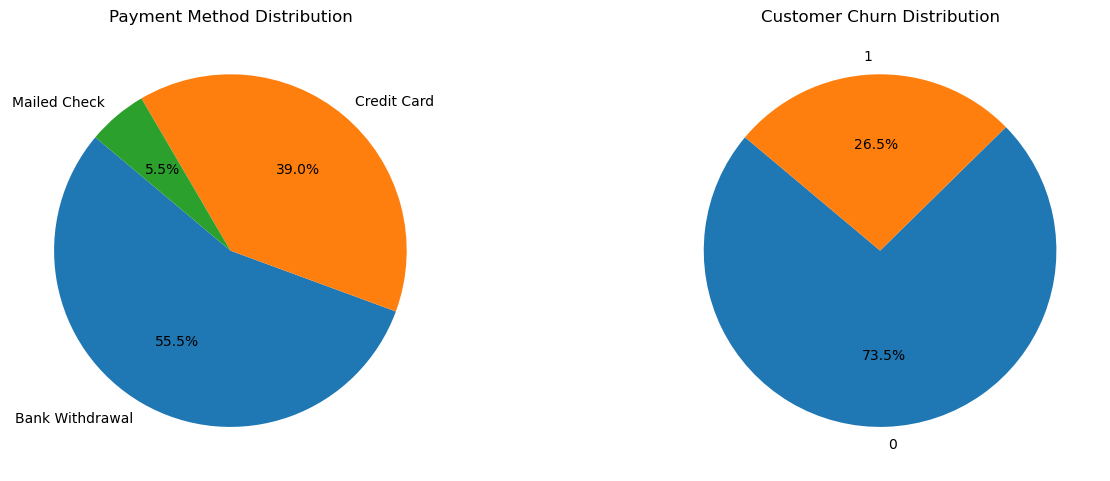

In [515]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

payment_counts = df["Payment Method"].value_counts()
payment_labels = df["Payment Method"].unique()

churn_counts = df["Churn"].value_counts()
churn_labels = df["Churn"].unique()

axes[0].pie(payment_counts, labels=payment_labels, autopct="%1.1f%%", startangle=140)
axes[0].set_title("Payment Method Distribution")


axes[1].pie(churn_counts, labels=churn_labels, autopct="%1.1f%%", startangle=140)
axes[1].set_title("Customer Churn Distribution")

plt.tight_layout(pad=5)
plt.show()

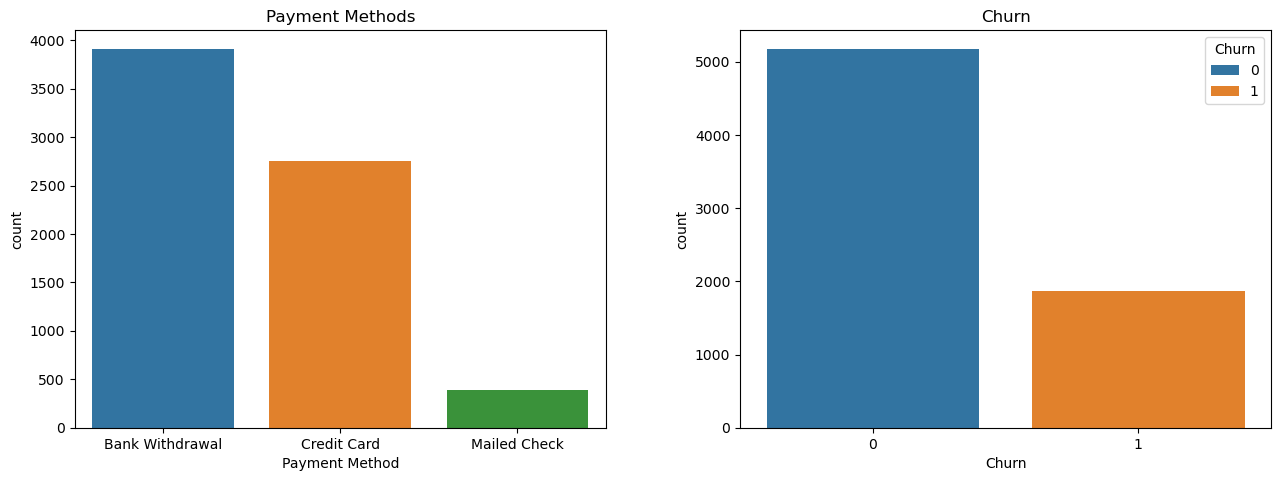

In [516]:
def create_countplot(data, x, hue, title, ax):
    sns.countplot(data=data, x=x, hue=hue, ax=ax)
    ax.set_title(title)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
create_countplot(df, "Payment Method", "Payment Method", "Payment Methods", axes[0])
create_countplot(df, "Churn", "Churn", "Churn", axes[1])
plt.tight_layout(pad=5)
plt.show()

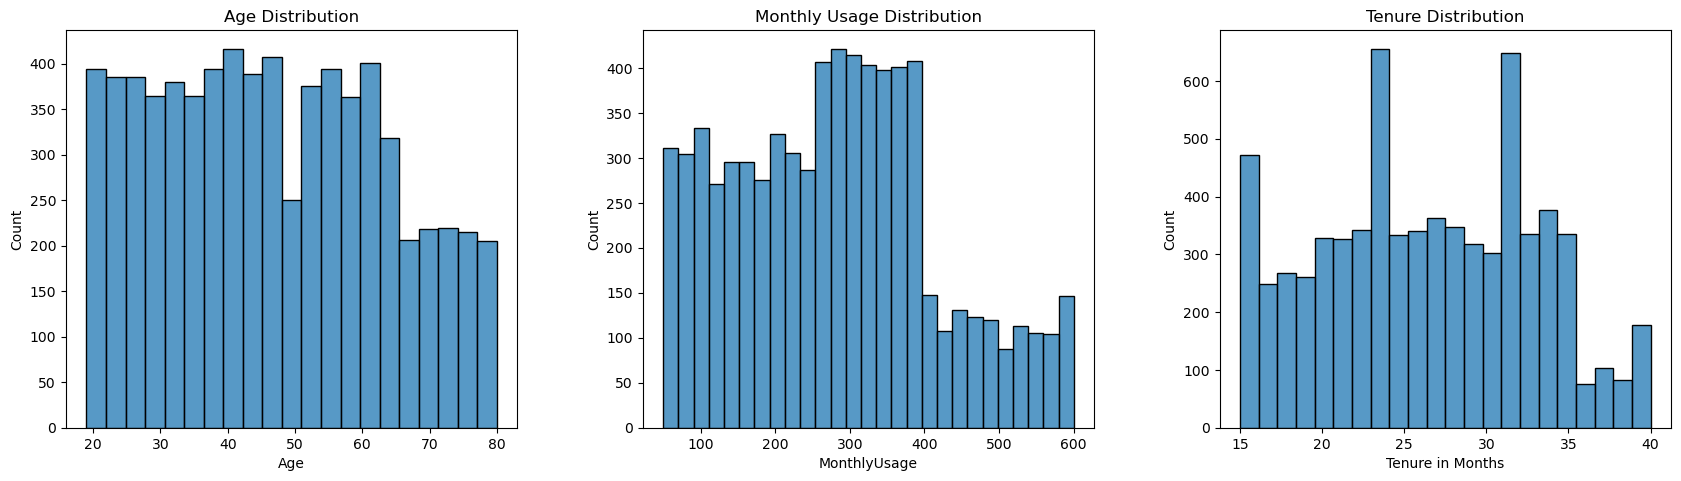

In [517]:
def create_histplot(data, x, title, ax):
    sns.histplot(data=data, x=x, ax=ax, legend=False)
    ax.set_title(title)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

create_histplot(df, "Age", "Age Distribution", axes[0])
create_histplot(df, "MonthlyUsage", "Monthly Usage Distribution", axes[1])
create_histplot(df, "Tenure in Months", "Tenure Distribution", axes[2])

plt.tight_layout(pad=5)
plt.show()

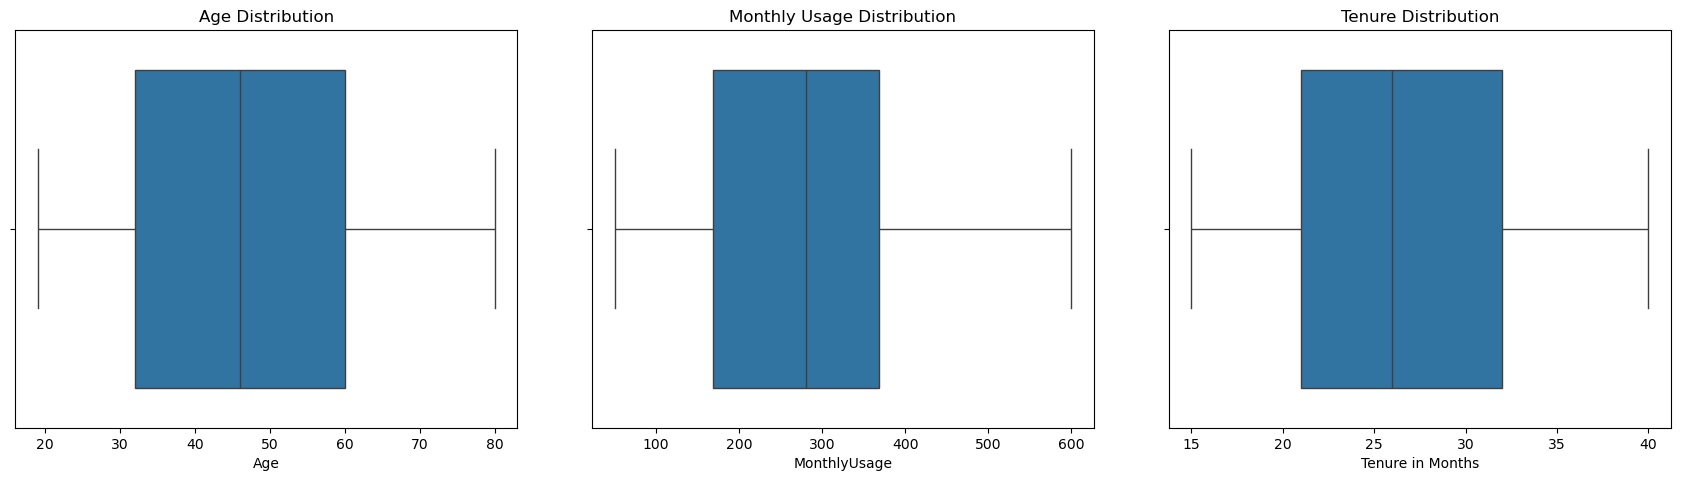

In [518]:
def create_boxplot(data, x, title, ax):
    sns.boxplot(data=data, x=x, ax=ax, legend=False)
    ax.set_title(title)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

create_boxplot(df, "Age", "Age Distribution", axes[0])
create_boxplot(df, "MonthlyUsage", "Monthly Usage Distribution", axes[1])
create_boxplot(df, "Tenure in Months", "Tenure Distribution", axes[2])

plt.tight_layout(pad=5)
plt.show()

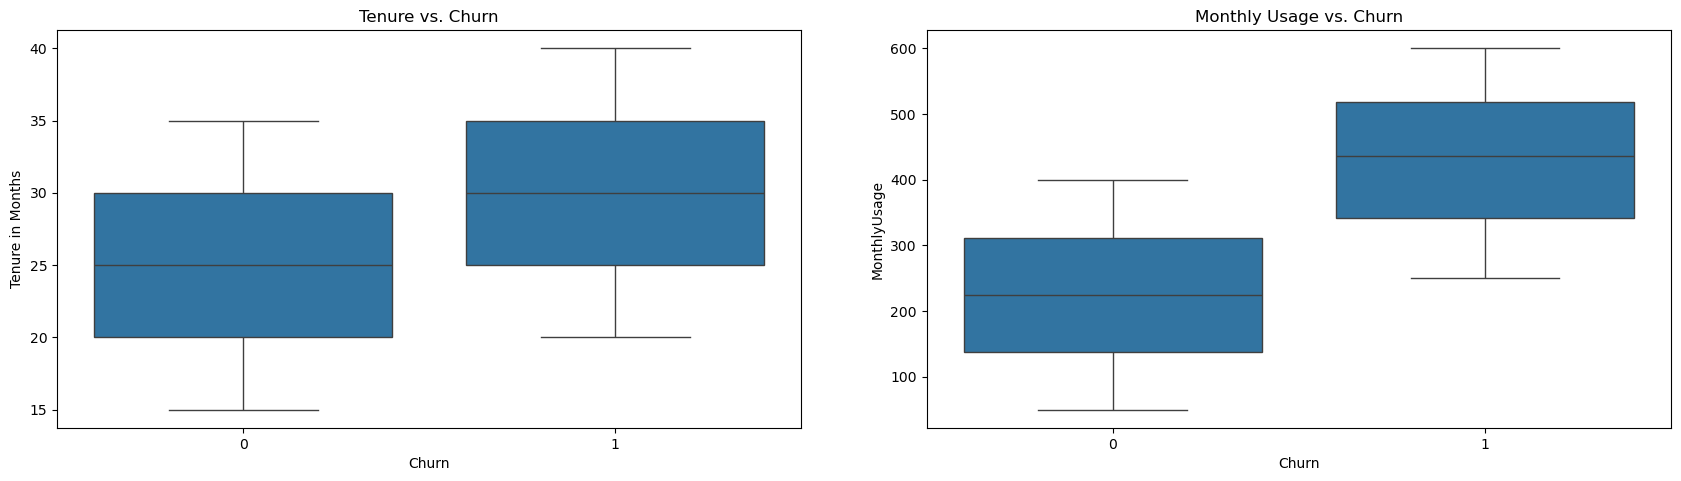

In [519]:
def create_boxplot(data, x, y, title, ax):
    sns.boxplot(data=data, x=y, y=x, ax=ax, legend=False)
    ax.set_title(title)


fig, axes = plt.subplots(1, 2, figsize=(18, 6))
create_boxplot(df, "Tenure in Months", "Churn", "Tenure vs. Churn", axes[0])
create_boxplot(df, "MonthlyUsage", "Churn", "Monthly Usage vs. Churn", axes[1])

plt.tight_layout(pad=5)
plt.show()

In [520]:
df.columns

Index(['Customer ID', 'Age', 'MonthlyUsage', 'Payment Method',
       'Tenure in Months', 'Churn'],
      dtype='object')

In [521]:
df = pd.get_dummies(df, columns=["Payment Method"])
df.head()

,Customer ID,Age,MonthlyUsage,Tenure in Months,Churn,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,4526-ZJJTM,72,354,20,0,True,False,False
1,5302-BDJNT,27,68,33,0,True,False,False
2,5468-BPMMO,59,319,34,0,True,False,False
3,2212-LYASK,25,138,30,0,False,True,False
4,0378-XSZPU,31,587,30,1,False,True,False


In [522]:
print("Shape of data after one-hot encoding:", df.shape)

Shape of data after one-hot encoding: (7043, 8)


In [523]:
df.columns

Index(['Customer ID', 'Age', 'MonthlyUsage', 'Tenure in Months', 'Churn',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check'],
      dtype='object')

In [524]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


X = df.drop(
    [
        "Churn",
        "Customer ID",
        "Payment Method_Bank Withdrawal",
        "Payment Method_Credit Card",
        "Payment Method_Mailed Check",
    ],
    axis=1,
)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [525]:
X_train

array([[-1.40612664,  2.16107664,  0.88394247],
       [-1.58565231,  0.30196466, -0.8335853 ],
       [-1.46596853, -0.18302108,  1.19622025],
       ...,
       [-0.50849827, -0.49164836, -1.14586308],
       [-0.3289726 , -0.92519622,  1.19622025],
       [ 1.04739089, -0.07279705,  0.57166469]])

In [526]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=11, metric="euclidean", p=1)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.88843813 0.92190669 0.92190669 0.88336714 0.9178499 ]
Mean cross-validation score: 0.9066937119675457


In [527]:
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [528]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
)

print(f"Accuracy Score: {accuracy_score(y_pred=y_pred, y_true=y_test):.3}")
print(f"Precision Score: {precision_score(y_pred=y_pred, y_true=y_test):.3}")
print(f"Recall Score: {recall_score(y_pred=y_pred, y_true=y_test):.3}")
print(f"F1 Score: {f1_score(y_pred=y_pred, y_true=y_test):.3}")

Accuracy Score: 0.902
Precision Score: 0.93
Recall Score: 0.69
F1 Score: 0.792


In [529]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1538
           1       0.93      0.69      0.79       575

    accuracy                           0.90      2113
   macro avg       0.91      0.84      0.86      2113
weighted avg       0.90      0.90      0.90      2113



<Axes: >

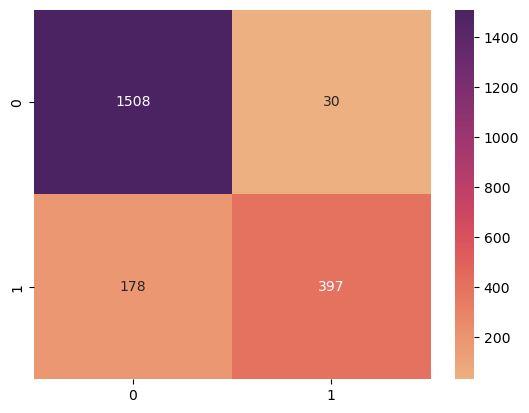

In [530]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, cmap="flare", fmt="d")

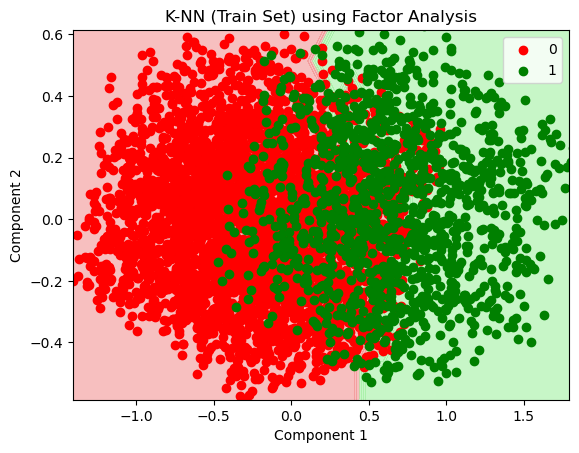

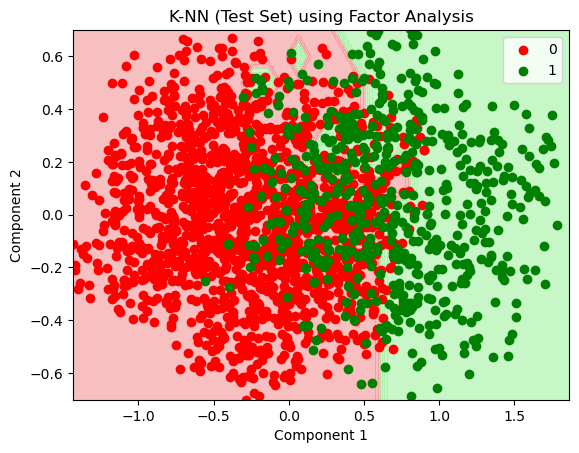

In [531]:
from matplotlib.colors import ListedColormap
from sklearn.decomposition import FactorAnalysis


def plot_decision_boundary(X, y, title):
    X_set, y_set = X, y

    pca = FactorAnalysis(n_components=2)
    X_set_pca = pca.fit_transform(X_set)

    knn.fit(X_set_pca, y_set)

    x1_min, x1_max = X_set_pca[:, 0].min() - 0, X_set_pca[:, 0].max() + 0
    x2_min, x2_max = X_set_pca[:, 1].min() - 0, X_set_pca[:, 1].max() + 0
    XX, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

    Z = knn.predict(np.c_[XX.ravel(), yy.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contourf(
        XX, yy, Z, alpha=0.5, cmap=ListedColormap(("lightcoral", "lightgreen"))
    )
    plt.xlim(XX.min(), XX.max())
    plt.ylim(yy.min(), yy.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set_pca[y_set == j, 0],
            X_set_pca[y_set == j, 1],
            color=ListedColormap(("red", "green"))(i),
            label=j,
        )

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()


plot_decision_boundary(X_train, y_train, "K-NN (Train Set) using Factor Analysis")
plot_decision_boundary(X_test, y_test, "K-NN (Test Set) using Factor Analysis")